# Applying noising algorithms

In [1]:
import noise
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img1 = Image.open('imgs/lights.png')
img2 = Image.open('imgs/tree.png')
img3 = Image.open('imgs/mandarines.png')

(-0.5, 735.5, 735.5, -0.5)

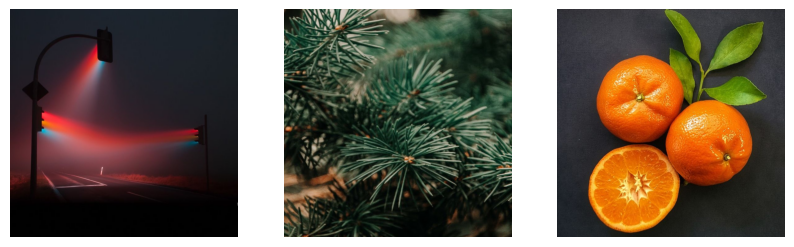

In [3]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.axis('off')

## Applying the noise

### Salt paper noise

In [4]:
img1_arr = (np.array(img1))[:,:,:3]
img1_arr_noise = noise.sp_noise_color(img1_arr)
img1_noise = Image.fromarray(img1_arr_noise, mode='RGB')

img2_arr = (np.array(img2))[:,:,:3]
img2_arr_noise = noise.sp_noise_color(img2_arr)
img2_noise = Image.fromarray(img2_arr_noise, mode='RGB')

img3_arr = (np.array(img3))[:,:,:3]
img3_arr_noise = noise.sp_noise_color(img3_arr)
img3_noise = Image.fromarray(img3_arr_noise, mode='RGB')

(-0.5, 735.5, 735.5, -0.5)

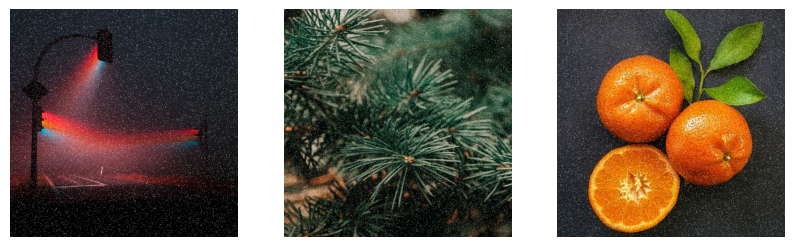

In [5]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(img1_noise)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2_noise)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3_noise)
plt.axis('off')

### Gaussian noise

In [6]:
img1_arr_noise_g = noise.norm_noise_color(img1_arr)
img1_noise_g = Image.fromarray(img1_arr_noise_g, mode='RGB')

img2_arr_noise_g = noise.norm_noise_color(img2_arr)
img2_noise_g = Image.fromarray(img2_arr_noise_g, mode='RGB')

img3_arr_noise_g = noise.norm_noise_color(img3_arr)
print(img3_arr_noise_g[:2])
img3_noise_g = Image.fromarray(img3_arr_noise_g, mode='RGB')

[[[ 44  44  49]
  [ 42  44  49]
  [ 48  49  53]
  ...
  [ 47  48  54]
  [ 50  52  56]
  [ 54  55  60]]

 [[253 253 254]
  [ 46  47  52]
  [ 49  51  56]
  ...
  [ 46  46  51]
  [ 46  46  52]
  [ 48  50  54]]]


(-0.5, 735.5, 735.5, -0.5)

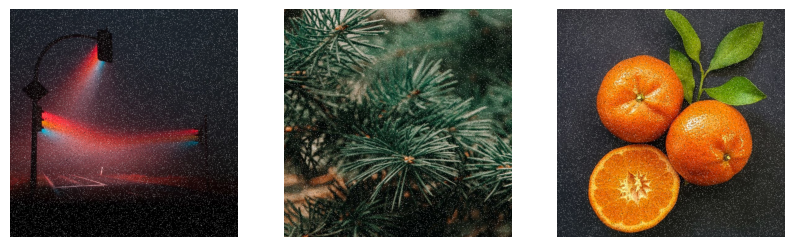

In [7]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 3, 1)
plt.imshow(img1_noise_g)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2_noise_g)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3_noise_g)
plt.axis('off')

## Denoising

### Box average

In [8]:
def apply_filter(img, filter='box_average'):
    red_pixels = img[:, :, 0].flatten()
    green_pixels = img[:, :, 1].flatten()
    blue_pixels = img[:, :, 2].flatten()

    pixel_r_matrix = np.array(red_pixels).reshape(img.shape[0], img.shape[1])
    pixel_g_matrix = np.array(green_pixels).reshape(img.shape[0], img.shape[1])
    pixel_b_matrix = np.array(blue_pixels).reshape(img.shape[0], img.shape[1])
    
    if(filter=='box_average'):
        filtered_r_pixels_image = __apply_box_ave(pixel_r_matrix)
        filtered_g_pixels_image = __apply_box_ave(pixel_g_matrix)
        filtered_b_pixels_image = __apply_box_ave(pixel_b_matrix)
    if(filter=='median'):
        filtered_r_pixels_image = __apply_median(pixel_r_matrix)
        filtered_g_pixels_image = __apply_median(pixel_g_matrix)
        filtered_b_pixels_image = __apply_median(pixel_b_matrix)
    if(filter=='weighted_median'):
        filtered_r_pixels_image = __apply_weighted_median(pixel_r_matrix)
        filtered_g_pixels_image = __apply_weighted_median(pixel_g_matrix)
        filtered_b_pixels_image = __apply_weighted_median(pixel_b_matrix)
     
    
    pixel_r_list = [pixel for row in filtered_r_pixels_image for pixel in row]
    pixel_g_list = [pixel for row in filtered_g_pixels_image for pixel in row]
    pixel_b_list = [pixel for row in filtered_b_pixels_image for pixel in row]
    # pixel_g_list = [pixel for row in pixel_g_matrix for pixel in row]
    # pixel_b_list = [pixel for row in pixel_b_matrix for pixel in row]

    result_img = np.array(list(zip(pixel_r_list, pixel_g_list, pixel_b_list)))
    result_img = result_img.reshape(img.shape[0], img.shape[1], 3)

    return result_img



def __apply_box_ave(img_wb):
    if len(img_wb.shape) == 3 and img_wb.shape[2] == 3:
        print("Error using 3 color image instead of 1")
        return

    img = img_wb.copy()
    filter_width = 3
    filter_height = 3
    img_width = len(img[0])
    img_height = len(img)
    
    res_img = np.zeros_like(img)
    
    for row in range(img_height - filter_height + 1):
        for col in range(img_width - filter_width + 1):
            res_img[row + 1][col + 1] = np.mean(img[row:row + 3, col:col + 3])

    return res_img

def __apply_median(img_wb):
    if len(img_wb.shape) == 3 and img_wb.shape[2] == 3:
        print("Error using 3 color image instead of 1")
        return

    img = img_wb.copy()
    filter_width = 3
    filter_height = 3
    img_width = len(img[0])
    img_height = len(img)
    
    res_img = np.zeros_like(img)
        
    for row in range(img_height - filter_height + 1):
        for col in range(img_width - filter_width + 1):
            res_img[row + 1][col + 1] = np.median(img[row:row + 3, col:col + 3])

    return res_img

def __apply_weighted_median(img_wb):
    if len(img_wb.shape) == 3 and img_wb.shape[2] == 3:
        print("Error using 3 color image instead of 1")
        return

    img = img_wb.copy()
    filter_width = 3
    filter_height = 3
    img_width = len(img[0])
    img_height = len(img)
    
    res_img = np.zeros_like(img)
    
    mask = [[1, 2, 1],[2, 4, 2],[1, 2, 1]]
    
    for row in range(img_height - filter_height + 1):
        for col in range(img_width - filter_width + 1):
            val = 0
            for i in range(filter_height):
                for j in range(filter_width):
                    val += img[row + i][col + j] * mask[i][j] //16
            res_img[row + 1][col + 1] = val

    return res_img


In [9]:
img1_arr_denoise = apply_filter(img1_arr_noise, filter='box_average')
img1_denoise = Image.fromarray(img1_arr_denoise, mode='RGB')

(-0.5, 735.5, 735.5, -0.5)

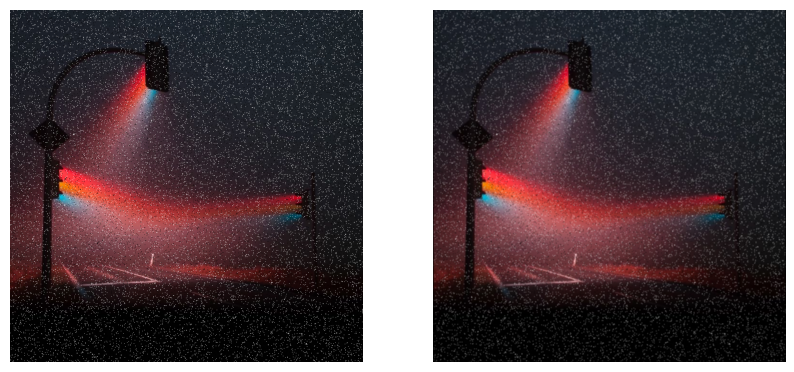

In [10]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(img1_noise)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1_denoise)
plt.axis('off')

### Median

In [11]:
img1_arr_denoise_median = apply_filter(img1_arr_noise, filter='median')
img1_denoise_median = Image.fromarray(img1_arr_denoise_median, mode='RGB')

(-0.5, 735.5, 735.5, -0.5)

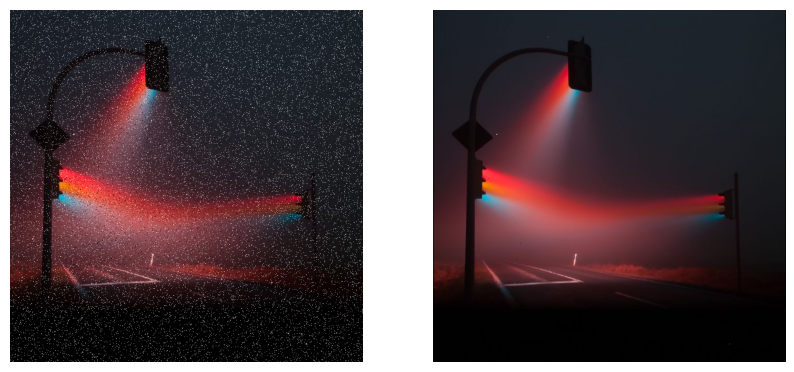

In [12]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(img1_noise)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1_denoise_median)
plt.axis('off')

### Weighted median

In [13]:
img1_arr_denoise_w_median = apply_filter(img1_arr_noise, filter='weighted_median')
img1_denoise_w_median = Image.fromarray(img1_arr_denoise_w_median, mode='RGB')

(-0.5, 735.5, 735.5, -0.5)

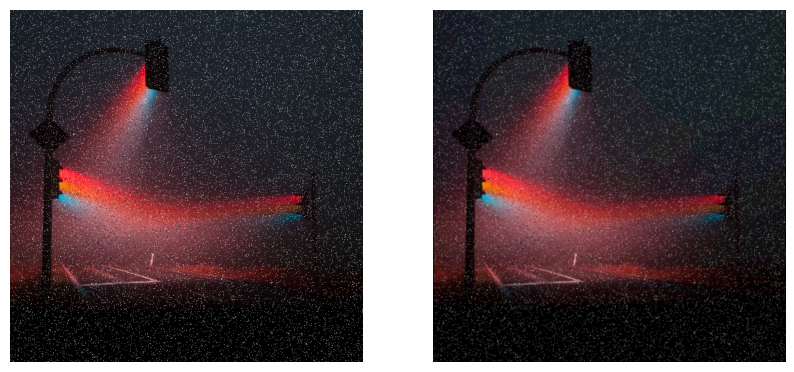

In [14]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(img1_noise)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1_denoise_w_median)
plt.axis('off')

## Results

In [15]:
img1_arr_denoise = apply_filter(img1_arr_noise, filter='box_average')
img1_denoise = Image.fromarray(img1_arr_denoise, mode='RGB')

img1_arr_denoise_median = apply_filter(img1_arr_noise, filter='median')
img1_denoise_median = Image.fromarray(img1_arr_denoise_median, mode='RGB')

img1_arr_denoise_w_median = apply_filter(img1_arr_noise, filter='weighted_median')
img1_denoise_w_median = Image.fromarray(img1_arr_denoise_w_median, mode='RGB')

img2_arr_denoise = apply_filter(img2_arr_noise, filter='box_average')
img2_denoise = Image.fromarray(img2_arr_denoise, mode='RGB')

img2_arr_denoise_median = apply_filter(img2_arr_noise, filter='median')
img2_denoise_median = Image.fromarray(img2_arr_denoise_median, mode='RGB')

img2_arr_denoise_w_median = apply_filter(img2_arr_noise, filter='weighted_median')
img2_denoise_w_median = Image.fromarray(img2_arr_denoise_w_median, mode='RGB')

img3_arr_denoise = apply_filter(img3_arr_noise, filter='box_average')
img3_denoise = Image.fromarray(img3_arr_denoise, mode='RGB')

img3_arr_denoise_median = apply_filter(img3_arr_noise, filter='median')
img3_denoise_median = Image.fromarray(img3_arr_denoise_median, mode='RGB')

img3_arr_denoise_w_median = apply_filter(img3_arr_noise, filter='weighted_median')
img3_denoise_w_median = Image.fromarray(img3_arr_denoise_w_median, mode='RGB')

Text(0.5, 1.0, 'weighted median')

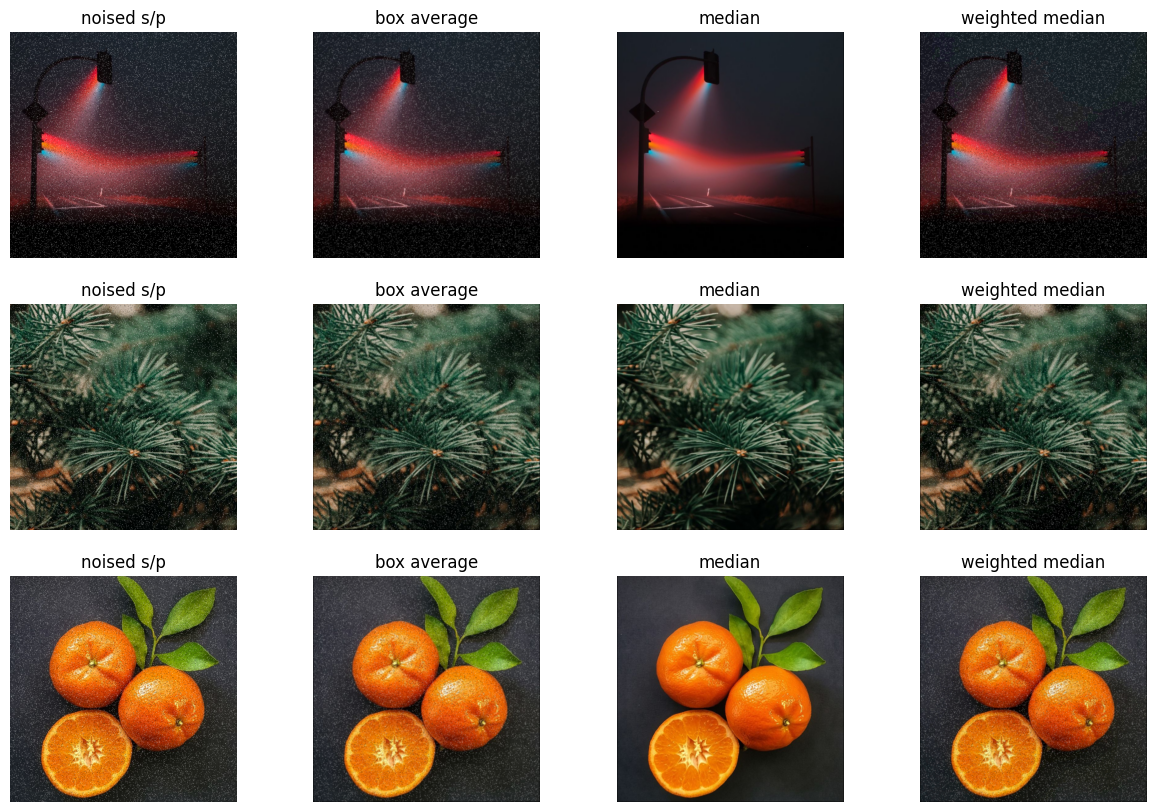

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.imshow(img1_noise)
plt.axis('off')
plt.title('noised s/p')

plt.subplot(3, 4, 2)
plt.imshow(img1_denoise)
plt.axis('off')
plt.title('box average')

plt.subplot(3, 4, 3)
plt.imshow(img1_denoise_median)
plt.axis('off')
plt.title('median')

plt.subplot(3, 4, 4)
plt.imshow(img1_denoise_w_median)
plt.axis('off')
plt.title('weighted median')

plt.subplot(3, 4, 5)
plt.imshow(img2_noise)
plt.axis('off')
plt.title('noised s/p')

plt.subplot(3, 4, 6)
plt.imshow(img2_denoise)
plt.axis('off')
plt.title('box average')

plt.subplot(3, 4, 7)
plt.imshow(img2_denoise_median)
plt.axis('off')
plt.title('median')

plt.subplot(3, 4, 8)
plt.imshow(img2_denoise_w_median)
plt.axis('off')
plt.title('weighted median')

plt.subplot(3, 4, 9)
plt.imshow(img3_noise)
plt.axis('off')
plt.title('noised s/p')

plt.subplot(3, 4, 10)
plt.imshow(img3_denoise)
plt.axis('off')
plt.title('box average')

plt.subplot(3, 4, 11)
plt.imshow(img3_denoise_median)
plt.axis('off')
plt.title('median')

plt.subplot(3, 4, 12)
plt.imshow(img3_denoise_w_median)
plt.axis('off')
plt.title('weighted median')
